**Name: Soumita Chel**

**Course: MSC Data Science **

**Part A: Thread Subreddit Classification
**

**Task1**

**File Location for Train and Test Data **

In [0]:
subreddit_train = "coursework_subreddit_train.json"
subreddit_test = "coursework_subreddit_test.json"

!gsutil cp gs://textasdata/coursework/coursework_subreddit_train.json $subreddit_train 
!gsutil cp gs://textasdata/coursework/coursework_subreddit_test.json  $subreddit_test

Copying gs://textasdata/coursework/coursework_subreddit_train.json...
- [1 files][ 10.1 MiB/ 10.1 MiB]                                                
Operation completed over 1 objects/10.1 MiB.                                     
Copying gs://textasdata/coursework/coursework_subreddit_test.json...
- [1 files][  2.7 MiB/  2.7 MiB]                                                
Operation completed over 1 objects/2.7 MiB.                                      


**Training Data Details**

In [0]:
import pandas as pd

train_threads = pd.read_json(path_or_buf=subreddit_train, lines=True)
print(list(train_threads.columns))
print(train_threads.head())
print(train_threads.size)
print(train_threads.count())


['is_self_post', 'posts', 'subreddit', 'title', 'url']
   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/relationships/comment...
1           1.0  ...  https://www.reddit.com/r/summonerschool/commen...
2           1.0  ...  https://www.reddit.com/r/AskReddit/comments/4d...
3           1.0  ...  https://www.reddit.com/r/trees/comments/1h300m...
4           1.0  ...  https://www.reddit.com/r/buildapc/comments/jhb...

[5 rows x 5 columns]
7280
is_self_post    1421
posts           1456
subreddit       1456
title           1456
url             1456
dtype: int64


**Test Data Details**

In [0]:
test_threads = pd.read_json(path_or_buf=subreddit_test, lines=True)
print(test_threads.head())
print(test_threads.size)
print(test_threads.count())


   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/starcraft/comments/mq...
1           1.0  ...  https://www.reddit.com/r/whowouldwin/comments/...
2           1.0  ...  https://www.reddit.com/r/AskReddit/comments/27...
3           1.0  ...  https://www.reddit.com/r/AskReddit/comments/x9...
4           1.0  ...  https://www.reddit.com/r/tipofmytongue/comment...

[5 rows x 5 columns]
1825
is_self_post    358
posts           365
subreddit       365
title           365
url             365
dtype: int64


**Subreddit Details**

In [0]:
subreddit_counts = train_threads['subreddit'].value_counts()
#print(subreddit_counts.describe())
top_subbreddits = subreddit_counts.nlargest(20)
print(top_subbreddits.describe())
top_subbreddits_list = top_subbreddits.index.tolist()
print(top_subbreddits_list)



count     20.000000
mean      72.800000
std       73.368285
min       28.000000
25%       36.250000
50%       45.500000
75%       63.750000
max      334.000000
Name: subreddit, dtype: float64
['askreddit', 'leagueoflegends', 'buildapc', 'explainlikeimfive', 'trees', 'techsupport', 'pcmasterrace', 'gaming', 'electronic_cigarette', 'relationships', 'tipofmytongue', 'jailbreak', 'hearthstone', 'summonerschool', 'atheism', 'reddit.com', 'movies', 'whowouldwin', 'personalfinance', 'starcraft']


**Dataframe Creation for Train Posts**

In [0]:
# Train Data
import json
import pandas as pd
posttrain_list=list()
with open(subreddit_train,'r') as (jsonfile):
  for i,line in enumerate(jsonfile):
    thread=json.loads(line)
    for post in thread['posts']:
      posttrain_list.append((thread['subreddit'], thread['title'], post['id'],
                    thread['url'], post.get('author', ""), 
                    post.get('body', ""),str(len(post))))
print("We have %d posts in our train dataset"%len(posttrain_list))

labels = ['subreddit', 'title', 'id', 'url', 'author', 'body','length']
posttrain = pd.DataFrame(posttrain_list,columns=labels)

#Author Columns if null
import numpy as np
posttrain = posttrain.replace('', 'Blank')
posttrain.head(20)



We have 15247 posts in our train dataset


subreddit  ... length
0    relationships  ...      8
1    relationships  ...      7
2    relationships  ...      8
3    relationships  ...      8
4    relationships  ...      8
5    relationships  ...      8
6    relationships  ...      8
7   summonerschool  ...      7
8   summonerschool  ...      7
9   summonerschool  ...      8
10  summonerschool  ...      8
11  summonerschool  ...      8
12  summonerschool  ...      8
13  summonerschool  ...      8
14  summonerschool  ...      8
15       askreddit  ...      8
16       askreddit  ...      8
17       askreddit  ...      6
18       askreddit  ...      8
19       askreddit  ...      8

[20 rows x 7 columns]

**DataFrame Creation For Test Posts**

In [0]:
#Test Data
import json
import pandas as pd
posttest_list=list()
with open(subreddit_test,'r') as (jsonfile):
  for i,line in enumerate(jsonfile):
    thread=json.loads(line)
    for post in thread['posts']:
      posttest_list.append((thread['subreddit'], thread['title'], post['id'], 
                    thread['url'], post.get('author', ""), 
                    post.get('body', ""),str(len(thread))))
print("We have %d posts in our test dataset"%len(posttest_list))

labels = ['subreddit', 'title', 'id', 'url', 'author', 'body','length']
posttest = pd.DataFrame(posttest_list,columns=labels)
#Author Columns if null
import numpy as np
posttest = posttest.replace('', 'Blank')
posttest.head()



We have 4016 posts in our test dataset


subreddit  ... length
0    starcraft  ...      5
1    starcraft  ...      5
2    starcraft  ...      5
3    starcraft  ...      5
4  whowouldwin  ...      5

[5 rows x 7 columns]

**Class Label Creation**

In [0]:
train_labels = posttrain['subreddit']
#validation_labels=tmp_validation['subreddit']
test_labels = posttest['subreddit']

**Tokenization And Normalization Import**

In [0]:
import spacy

# Load the medium english model. 
# We will use this model to get embedding features for tokens later.
!python -m spacy download en_core_web_md

nlp = spacy.load('en_core_web_md', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

# Download a stopword list
import nltk
nltk.download('stopwords')

     |████████████████████████████████| 120.9MB 1.1MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-noa_mrx6/wheels/db/5d/d0/ccdad6b01f9695b4a33793158530b3228223ee31463441663d
Successfully built en-core-web-md

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#@Tokenize
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

#@Normalize
def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    #if ((token.is_alpha or token.is_digit)):
    #Added as one of the Features for Question 2
    if ((token.is_alpha or token.is_digit or  token.is_ascii or token.is_punct)):
      normalized_tokens.append(normalized)
  return normalized_tokens
  return normalized_tokens

#@Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

In [0]:
#@Tokenization and Normalization Input One-hot Encoding
from sklearn.feature_extraction.text import CountVectorizer
one_hot_vectorizer = CountVectorizer(tokenizer=tokenize_normalize, binary=True)
train_features = one_hot_vectorizer.fit_transform(posttrain['body'])
test_features = one_hot_vectorizer.transform(posttest['body'])
#validation_features = one_hot_vectorizer.transform(tmp_validation['body'])
#@Tokenization and Normalization Input TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize)
tfidf_document_term_matrix_train = tfidf_vectorizer.fit_transform(posttrain['body'])
tfidf_document_term_matrix_test = tfidf_vectorizer.transform(posttest['body'])
#tfidf_document_term_matrix_validation = tfidf_vectorizer.transform(tmp_validation['body'])

**Feature Union**

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

**Feature Union One Hot Encoding**

In [0]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Use FeatureUnion to combine the features from title,author,body hot-encoding
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize)), 
              ])),
            ('author', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize)), 
              ])),
             ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize)), 
              ]))
        ])
        )
    ])
# Use FeatureUnion to combine the features from title,author,body tfidf
prediction_pipeline_tfid = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
            ('author', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ])),
             ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('one-hot', TfidfVectorizer(tokenizer=tokenize_normalize)), 
              ]))
        ])
        )
    ])

In [0]:
#FeatureUnion One Hot Encoding
pipeline_train=prediction_pipeline.fit_transform(posttrain)
#pipeline_validation=prediction_pipeline.transform(tmp_validation)
pipeline_test=prediction_pipeline.transform(posttest)
#FeatureUnion Tfidf
pipeline_train_tf=prediction_pipeline_tfid.fit_transform(posttrain)
#pipeline_validation_tf=prediction_pipeline_tfid.transform(tmp_validation)
pipeline_test_tf=prediction_pipeline_tfid.transform(posttest)


**Evaluation Metrics**

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels,average='micro')
  recall = recall_score(predictions, true_labels,average='micro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1,average='micro') #1 means f_1 measure
  print("Accuracy",accuracy)
  print((description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels, digits=3))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.

**Logistics Regression with One Hot Encoding Feature Union**





In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(pipeline_train, train_labels)
#evaluation_summary("LR onehot Feature Union Validation", lr_model.predict(pipeline_validation), validation_labels)
evaluation_summary("LR onehot Feature Union Test", lr_model.predict(pipeline_test), test_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Evaluation for: LR onehot Feature Union Test
Accuracy 0.5582669322709163
('LR onehot Feature Union Test', 0.5582669322709163, 0.5582669322709163, 0.5582669322709163, 0.5582669322709163)
                      precision    recall  f1-score   support

           askreddit      0.814     0.617     0.702      1385
             atheism      0.386     0.691     0.496       123
            buildapc      0.798     0.613     0.694       336
electronic_cigarette      0.554     0.600     0.576       170
   explainlikeimfive      0.406     0.412     0.409        68
              gaming      0.144     0.149     0.146       175
         hearthstone      0.275     0.815     0.411        54
           jailbreak      0.287     0.794     0.422        34
     leagueoflegends      0.852     0.449     0.588       817
              movies      0.293     0.605     0.395        76
        pcmasterrace      0.352     0.588     0.441       148
     personalfinance      0.497     0.875     0.634       104
       

**Logistics Regression with TFidf Feature Union**

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(pipeline_train_tf, train_labels)
#evaluation_summary("LR TFidf Feature Union Validation", lr_model.predict(pipeline_validation_tf), validation_labels)
evaluation_summary("LR TFidf Feature Union Test", lr_model.predict(pipeline_test_tf), test_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Evaluation for: LR TFidf Feature Union Test
Accuracy 0.5500498007968128
('LR TFidf Feature Union Test', 0.5500498007968128, 0.5500498007968128, 0.5500498007968128, 0.5500498007968128)
                      precision    recall  f1-score   support

           askreddit      0.888     0.544     0.675      1713
             atheism      0.291     0.941     0.444        68
            buildapc      0.860     0.613     0.716       362
electronic_cigarette      0.413     0.567     0.478       134
   explainlikeimfive      0.319     0.500     0.389        44
              gaming      0.117     0.172     0.139       122
         hearthstone      0.169     1.000     0.289        27
           jailbreak      0.340     0.889     0.492        36
     leagueoflegends      0.831     0.464     0.596       771
              movies      0.140     0.759     0.237        29
        pcmasterrace      0.300     0.643     0.409       115
     personalfinance      0.410     0.852     0.554        88
         

**SVC Classifier with One Hot Encoding Feature Union**

In [0]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')
svclassifier_model = svclassifier.fit(pipeline_train, train_labels)
#evaluation_summary("SVC HotEncoding Feature Union Validation", svclassifier_model.predict(pipeline_validation), validation_labels)
evaluation_summary("SVC HotEncoding Feature Union Test", svclassifier_model.predict(pipeline_test), test_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Evaluation for: SVC HotEncoding Feature Union Test
Accuracy 0.26917330677290835
('SVC HotEncoding Feature Union Test', 0.26917330677290835, 0.26917330677290835, 0.26917330677290835, 0.26917330677290835)
                      precision    recall  f1-score   support

           askreddit      0.999     0.263     0.417      3982
             atheism      0.000     0.000     0.000         0
            buildapc      0.116     0.968     0.208        31
electronic_cigarette      0.000     0.000     0.000         0
   explainlikeimfive      0.000     0.000     0.000         0
              gaming      0.000     0.000     0.000         0
         hearthstone      0.000     0.000     0.000         0
           jailbreak      0.000     0.000     0.000         0
     leagueoflegends      0.000     0.000     0.000         0
              movies      0.000     0.000     0.000         0
        pcmasterrace      0.000     0.000     0.000         0
     personalfinance      0.000     0.000     0.000 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**SVC Classifier with TFidf Feature Union**

In [0]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')
svclassifier_model = svclassifier.fit(pipeline_train_tf, train_labels)
#evaluation_summary("SVC TFidf Feature Union Validation", svclassifier_model.predict(pipeline_validation_tf), validation_labels)
evaluation_summary("SVC TFidf Feature Union Test", svclassifier_model.predict(pipeline_test_tf), test_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Evaluation for: SVC TFidf Feature Union Test
Accuracy 0.26145418326693226
('SVC TFidf Feature Union Test', 0.26145418326693226, 0.26145418326693226, 0.26145418326693226, 0.26145418326693226)
                      precision    recall  f1-score   support

           askreddit      1.000     0.261     0.415      4016
             atheism      0.000     0.000     0.000         0
            buildapc      0.000     0.000     0.000         0
electronic_cigarette      0.000     0.000     0.000         0
   explainlikeimfive      0.000     0.000     0.000         0
              gaming      0.000     0.000     0.000         0
         hearthstone      0.000     0.000     0.000         0
           jailbreak      0.000     0.000     0.000         0
     leagueoflegends      0.000     0.000     0.000         0
              movies      0.000     0.000     0.000         0
        pcmasterrace      0.000     0.000     0.000         0
     personalfinance      0.000     0.000     0.000         0
  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**Own Choosen Classifier with One Hot Encoding Feature Union**

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Evaluation for: Own  HotEncoding Feature Union Test
Accuracy 0.6090637450199203
('Own  HotEncoding Feature Union Test', 0.6090637450199203, 0.6090637450199203, 0.6090637450199203, 0.6090637450199203)
                      precision    recall  f1-score   support

           askreddit      0.860     0.633     0.729      1427
             atheism      0.395     0.798     0.529       109
            buildapc      0.833     0.646     0.728       333
electronic_cigarette      0.728     0.604     0.660       222
   explainlikeimfive      0.478     0.379     0.423        87
              gaming      0.256     0.254     0.255       181
         hearthstone      0.463     0.949     0.622        78
           jailbreak      0.500     0.940     0.653        50
     leagueoflegends      0.849     0.546     0.665       670
              movies      0.299     0.870     0.445        54
        pcmasterrace      0.348     0.558     0.429       154
     personalfinance      0.541     0.853     0.662    

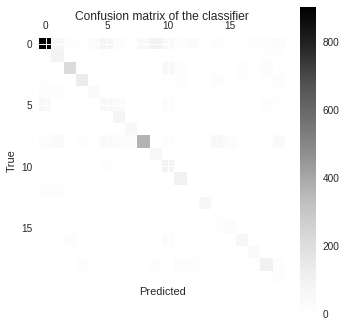

In [0]:
from sklearn.neural_network import MLPClassifier
own_model =   MLPClassifier()
own_model = own_model.fit(pipeline_train, train_labels)
#evaluation_summary("Own  HotEncoding Feature Union Validation", own_model.predict(pipeline_validation), validation_labels)
evaluation_summary("Own  HotEncoding Feature Union Test", own_model.predict(pipeline_test), test_labels)
true_label= own_model.predict(pipeline_test)
import pylab as pl
cm=confusion_matrix(true_label, test_labels)
pl.matshow(cm,'b')
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

**Own Choosen Classifier with TFidf Feature Union**

In [0]:
from sklearn.neural_network import MLPClassifier
own_model =   MLPClassifier(alpha=1)
own_model = own_model.fit(pipeline_train_tf, train_labels)
#evaluation_summary("Own  TFIDF Feature Union Validation", own_model.predict(pipeline_validation_tf), validation_labels)
evaluation_summary("Own  TFIDF Feature Union Test", own_model.predict(pipeline_test_tf), test_labels)

Evaluation for: Own  TFIDF Feature Union Test
Accuracy 0.4312749003984064
('Own  TFIDF Feature Union Test', 0.4312749003984064, 0.4312749003984064, 0.4312749003984064, 0.4312749003984064)
                      precision    recall  f1-score   support

           askreddit      0.943     0.464     0.622      2132
             atheism      0.000     0.000     0.000         0
            buildapc      0.888     0.430     0.579       533
electronic_cigarette      0.348     0.582     0.435       110
   explainlikeimfive      0.000     0.000     0.000         0
              gaming      0.000     0.000     0.000         0
         hearthstone      0.000     0.000     0.000         0
           jailbreak      0.000     0.000     0.000         0
     leagueoflegends      0.819     0.325     0.465      1086
              movies      0.000     0.000     0.000         0
        pcmasterrace      0.028     0.318     0.052        22
     personalfinance      0.000     0.000     0.000         0
     

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**Dummy Classifier One Hot Encoding Feature Union**

In [0]:
from sklearn.dummy import DummyClassifier

dummy_mf1 = DummyClassifier(strategy='most_frequent')
dummy_mf1.fit(pipeline_train, train_labels)
#evaluation_summary("Dummy Majority One Hot Encoding Validation", dummy_mf1.predict(pipeline_validation), validation_labels)
evaluation_summary("Dummy Majority One Hot Encoding Test", dummy_mf1.predict(pipeline_test), test_labels)

from sklearn.dummy import DummyClassifier
dummy_prior2 = DummyClassifier(strategy='stratified')
dummy_prior2.fit(pipeline_train, train_labels)
#evaluation_summary("Dummy Prior One Hot Encoding Validation", dummy_prior2.predict(pipeline_validation), validation_labels)
evaluation_summary("Dummy Prior One Hot Encoding Test", dummy_mf1.predict(pipeline_test), test_labels)

Evaluation for: Dummy Majority One Hot Encoding Test
Accuracy 0.26145418326693226
('Dummy Majority One Hot Encoding Test', 0.26145418326693226, 0.26145418326693226, 0.26145418326693226, 0.26145418326693226)
                      precision    recall  f1-score   support

           askreddit      1.000     0.261     0.415      4016
             atheism      0.000     0.000     0.000         0
            buildapc      0.000     0.000     0.000         0
electronic_cigarette      0.000     0.000     0.000         0
   explainlikeimfive      0.000     0.000     0.000         0
              gaming      0.000     0.000     0.000         0
         hearthstone      0.000     0.000     0.000         0
           jailbreak      0.000     0.000     0.000         0
     leagueoflegends      0.000     0.000     0.000         0
              movies      0.000     0.000     0.000         0
        pcmasterrace      0.000     0.000     0.000         0
     personalfinance      0.000     0.000     0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**Dummy Classifier Tfidf  Feature Union**

In [0]:
from sklearn.dummy import DummyClassifier
dummy_mf3 = DummyClassifier(strategy='most_frequent')
dummy_mf3.fit(pipeline_train_tf, train_labels)
#evaluation_summary("Dummy Majority Tfidf Validation", dummy_mf3.predict(pipeline_validation_tf), validation_labels)
evaluation_summary("Dummy Majority Tfidf Test", dummy_mf3.predict(pipeline_test_tf), test_labels)

from sklearn.dummy import DummyClassifier
dummy_prior4 = DummyClassifier(strategy='stratified')
dummy_prior4.fit(pipeline_train_tf, train_labels)
#evaluation_summary("Dummy Prior Tfidf Validation", dummy_prior4.predict(pipeline_validation_tf), validation_labels)
evaluation_summary("Dummy Prior Tfidf Test", dummy_prior4.predict(pipeline_test_tf), test_labels)



Evaluation for: Dummy Majority Tfidf Test
Accuracy 0.26145418326693226
('Dummy Majority Tfidf Test', 0.26145418326693226, 0.26145418326693226, 0.26145418326693226, 0.26145418326693226)
                      precision    recall  f1-score   support

           askreddit      1.000     0.261     0.415      4016
             atheism      0.000     0.000     0.000         0
            buildapc      0.000     0.000     0.000         0
electronic_cigarette      0.000     0.000     0.000         0
   explainlikeimfive      0.000     0.000     0.000         0
              gaming      0.000     0.000     0.000         0
         hearthstone      0.000     0.000     0.000         0
           jailbreak      0.000     0.000     0.000         0
     leagueoflegends      0.000     0.000     0.000         0
              movies      0.000     0.000     0.000         0
        pcmasterrace      0.000     0.000     0.000         0
     personalfinance      0.000     0.000     0.000         0
        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**Task 2**

**Parameter Tunning**

In [0]:
from sklearn.pipeline import Pipeline
prediction_pipeline_task2 = Pipeline([
              ('selector1', ItemSelector(key='body')),
              ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize)),
              ('logreg', LogisticRegression())])



In [0]:
from sklearn.model_selection import GridSearchCV
import numpy as np
c=np.power(10.0,np.arange(-3,4))
c1=list(c)
m=np.arange(1,50000)
m1=list(m)
print(m1.append(None))
print(m1)




params = {
   #'tfidf__sublinear_tf': (True, False),
   'tfidf__ngram_range': ((1, 1), (1, 2)),
   #'tfidf__max_features':m1,
   #'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
   #'logreg__multi_class':('ovr','auto'),
   #'logreg__C':c1,
   
   
}
    

grid_search = GridSearchCV(prediction_pipeline_task2, param_grid=params, n_jobs=1, verbose=1, scoring='f1_macro', cv=2)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline_task2.steps])
print("parameters:")
print(params)
grid_search.fit(posttrain, train_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))



None
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 22

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   45.3s finished


Best score: 0.206
Best parameters set:
	tfidf__ngram_range: (1, 1)


**Logistic Regression Model (TF_IDF) with Best Features**

In [0]:


pipeline_train_tf=prediction_pipeline_tfid.fit_transform(posttrain)
#pipeline_validation_tf=prediction_pipeline_tfid.transform(tmp_validation)
pipeline_test_tf=prediction_pipeline_tfid.transform(posttest)
lr = LogisticRegression(C=100,multi_class='ovr',solver='liblinear')
lr_model = lr.fit(pipeline_train_tf, train_labels)
#evaluation_summary("LR TFidf Feature Union Best Features Validation", lr_model.predict(pipeline_validation_tf), validation_labels)
evaluation_summary("LR TFidf Feature Union Best Features Test", lr_model.predict(pipeline_test_tf),test_labels)


Evaluation for: LR TFidf Feature Union Best Features Test
Accuracy 0.5612549800796812
('LR TFidf Feature Union Best Features Test', 0.5612549800796812, 0.5612549800796812, 0.5612549800796812, 0.5612549800796812)
                      precision    recall  f1-score   support

           askreddit      0.833     0.600     0.697      1459
             atheism      0.309     0.840     0.452        81
            buildapc      0.884     0.594     0.710       384
electronic_cigarette      0.440     0.544     0.486       149
   explainlikeimfive      0.275     0.306     0.290        62
              gaming      0.144     0.144     0.144       180
         hearthstone      0.306     0.875     0.454        56
           jailbreak      0.457     0.843     0.593        51
     leagueoflegends      0.798     0.569     0.664       605
              movies      0.185     0.446     0.261        65
        pcmasterrace      0.312     0.550     0.398       140
     personalfinance      0.470     0.610  

**True And Predicted Label And Error Analysis**

In [0]:
predicted= lr_model.predict(pipeline_test_tf).tolist()
#print("List of true labels:",true_label)
true_label=test_labels
#print("Predicted Label:",predicted_label)
true_label_list=test_labels.tolist()
true_label_dict=test_labels.to_dict()
#print("Predicted Label in Dictionary Format:",predicted_label_dict)
mismatch=[i for i, j in zip(predicted, true_label_list) if  i!=j]
print("Mismatch has occured for the following labels:",mismatch)
print("Count of Mismatch labels:",len(mismatch))
posttest.iloc[80].head()

Mismatch has occured for the following labels: ['gaming', 'gaming', 'gaming', 'gaming', 'askreddit', 'askreddit', 'askreddit', 'atheism', 'askreddit', 'askreddit', 'askreddit', 'askreddit', 'askreddit', 'askreddit', 'askreddit', 'askreddit', 'askreddit', 'leagueoflegends', 'askreddit', 'atheism', 'atheism', 'leagueoflegends', 'atheism', 'gaming', 'gaming', 'gaming', 'gaming', 'gaming', 'gaming', 'gaming', 'gaming', 'gaming', 'gaming', 'gaming', 'leagueoflegends', 'leagueoflegends', 'leagueoflegends', 'leagueoflegends', 'askreddit', 'askreddit', 'askreddit', 'askreddit', 'askreddit', 'askreddit', 'askreddit', 'leagueoflegends', 'leagueoflegends', 'pcmasterrace', 'pcmasterrace', 'pcmasterrace', 'pcmasterrace', 'leagueoflegends', 'leagueoflegends', 'hearthstone', 'pcmasterrace', 'pcmasterrace', 'leagueoflegends', 'pcmasterrace', 'personalfinance', 'personalfinance', 'leagueoflegends', 'personalfinance', 'personalfinance', 'personalfinance', 'personalfinance', 'personalfinance', 'personalf

subreddit                                             buildapc
title        [£] What is the cheapest z97 motherboard I can...
id                                                  t1_co4xnzx
url          https://www.reddit.com/r/buildapc/comments/2u4...
author                                                   Blank
Name: 80, dtype: object

**Feature Addition**

In [0]:


prediction_pipeline_tfid = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000,)), 
              ])),
            ('author', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000,)), 
              ])),
             ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000,)), 
              ])),
             ('length', Pipeline([
              ('selector', ItemSelector(key='length')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000,)),
              ]))
             
        ])
        )
    ])

pipeline_train_tf=prediction_pipeline_tfid.fit_transform(posttrain)
#pipeline_validation_tf=prediction_pipeline_tfid.transform(tmp_validation)
pipeline_test_tf=prediction_pipeline_tfid.transform(posttest)
lr = LogisticRegression(C=100,multi_class='ovr',solver='liblinear')
lr_model = lr.fit(pipeline_train_tf, train_labels)
#evaluation_summary("LR TFidf Feature Union Best Features Validation", lr_model.predict(pipeline_validation_tf), validation_labels)
evaluation_summary("LR TFidf Feature Union Best Features Test", lr_model.predict(pipeline_test_tf),test_labels)


Evaluation for: LR TFidf Feature Union Best Features Test
Accuracy 0.5948705179282868
('LR TFidf Feature Union Best Features Test', 0.5948705179282868, 0.5948705179282868, 0.5948705179282868, 0.5948705179282868)
                      precision    recall  f1-score   support

           askreddit      0.813     0.654     0.725      1306
             atheism      0.382     0.792     0.515       106
            buildapc      0.857     0.739     0.794       299
electronic_cigarette      0.576     0.538     0.556       197
   explainlikeimfive      0.652     0.849     0.738        53
              gaming      0.072     0.151     0.098        86
         hearthstone      0.338     0.982     0.502        55
           jailbreak      0.564     0.898     0.693        59
     leagueoflegends      0.854     0.480     0.615       766
              movies      0.325     0.662     0.436        77
        pcmasterrace      0.316     0.481     0.381       162
     personalfinance      0.508     0.721  

**Part B: Comment Discourse Classification**

**Loading Discourse Train and Test Files**

In [0]:
discourse_train = "coursework_discourse_train.json"
discourse_test = "coursework_discourse_test.json"
  
!gsutil cp gs://textasdata/coursework/coursework_discourse_train.json $discourse_train  
!gsutil cp gs://textasdata/coursework/coursework_discourse_test.json  $discourse_test

Copying gs://textasdata/coursework/coursework_discourse_train.json...
\ [1 files][ 60.2 MiB/ 60.2 MiB]                                                
Operation completed over 1 objects/60.2 MiB.                                     
Copying gs://textasdata/coursework/coursework_discourse_test.json...
- [1 files][ 15.1 MiB/ 15.1 MiB]                                                
Operation completed over 1 objects/15.1 MiB.                                     


**Creation of Train DataFrame**

In [0]:
# The reddit thread structure is nested with posts in a new content.
# This block reads the file as json and creates a new data frame.
import pandas as pd
import json

#Train Dataframe
# A temporary variable to store the list of post content.
posts_tmp = list()
with open(discourse_train) as jsonfile:
  for i, line in enumerate(jsonfile):
   # if (i > 2): break
    thread = json.loads(line)
    for post in thread['posts']:
      # NOTE: This could be changed to use additional features from the post or thread.
      # DO NOT change the labels for the test set.
      posts_tmp.append((thread['subreddit'], thread['title'], thread['url'],
                      post['id'], post.get('author', ""), post.get('body', ""), post.get("majority_link", ""), 
                      str(post.get('post_depth', 0)), post.get('majority_type', ""), # discourse type label 
                      post.get('in_reply_to', ""),str(thread['is_self_post'])))

# Create the posts data frame.  
labels = ['subreddit', 'title', 'url', 'id', 'author', 'body', 'majority_link', 
        'post_depth', 'discourse_type', 'in_reply_to','selfpost']
post_train= pd.DataFrame(posts_tmp, columns=labels)
#Columns if null
import numpy as np
post_train = post_train.replace('', 'Blank')
#author_counts = replaced_authors['in_reply_to'].value_counts()
post_train['author_check'] = np.where(post_train['id']==post_train['in_reply_to'], 'Yes', 'No')
post_train.head(30)

subreddit                           title  \
0   worldofpvp  Help me decide my new PvP main   
1   worldofpvp  Help me decide my new PvP main   
2   worldofpvp  Help me decide my new PvP main   
3   worldofpvp  Help me decide my new PvP main   
4   worldofpvp  Help me decide my new PvP main   
5   worldofpvp  Help me decide my new PvP main   
6   worldofpvp  Help me decide my new PvP main   
7        anime         Anime so bad it's good?   
8        anime         Anime so bad it's good?   
9        anime         Anime so bad it's good?   
10       anime         Anime so bad it's good?   
11       anime         Anime so bad it's good?   
12       anime         Anime so bad it's good?   
13       anime         Anime so bad it's good?   
14       anime         Anime so bad it's good?   
15       anime         Anime so bad it's good?   
16       anime         Anime so bad it's good?   
17       anime         Anime so bad it's good?   
18       anime         Anime so bad it's good?   
19       anime         Anime so bad it's good?   
20       anime         Anime so bad it's good?   
21       anime         Anime so bad it's good?   
22       anime         Anime so bad it's good?   
23       anime         Anime so bad it's good?   
24       anime         Anime so bad it's good?   
25       anime         Anime so bad it's good?   
26       anime         Anime so bad it's good?   
27       anime         Anime so bad it's good?   
28       anime         Anime so bad it's good?   
29       anime         Anime so bad it's good?   

                                                  url          id  \
0   https://www.reddit.com/r/worldofpvp/comments/2...   t3_2v0anq   
1   https://www.reddit.com/r/worldofpvp/comments/2...  t1_codb2p9   
2   https://www.reddit.com/r/worldofpvp/comments/2...  t1_codg0we   
3   https://www.reddit.com/r/worldofpvp/comments/2...  t1_coeatsq   
4   https://www.reddit.com/r/worldofpvp/comments/2...  t1_codbyit   
5   https://www.reddit.com/r/worldofpvp/comments/2...  t1_coef9rv   
6   https://www.reddit.com/r/worldofpvp/comments/2...  t1_cofuikq   
7   https://www.reddit.com/r/anime/comments/3zdmxu...   t3_3zdmxu   
8   https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylazgc   
9   https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylbxsl   
10  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylj18t   
11  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylh3p4   
12  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylbh2g   
13  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylbmqs   
14  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylc6l3   
15  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cyld629   
16  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylbxdm   
17  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylc4hq   
18  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylganj   
19  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylbkhq   
20  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylcwce   
21  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylaprj   
22  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylarmg   
23  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylbnw7   
24  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cyla8u2   
25  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylaof9   
26  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylah2l   
27  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylb9xh   
28  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylba4t   
29  https://www.reddit.com/r/anime/comments/3zdmxu...  t1_cylay5o   

                  author                                               body  \
0               TyrickEU  Hi. \nAs a raider previously, i had no problem...   
1                   vurt  [deleted]  \n ^^^^^^^^^^^^^^^^0.5422 \n > [Wha...   
2            OptimusNice  This goes mostly for 3v3 since that seems to b...  

**Creation of Test DataFrame**

In [0]:
import pandas as pd
import json

#Train Dataframe
  # A temporary variable to store the list of post content.
posts_tmp = list()

with open(discourse_test) as jsonfile:
  for i, line in enumerate(jsonfile):
   # if (i > 2): break
    thread = json.loads(line)
    for post in thread['posts']:
      # NOTE: This could be changed to use additional features from the post or thread.
      # DO NOT change the labels for the test set.
      posts_tmp.append((thread['subreddit'], thread['title'], thread['url'],
                      post['id'], post.get('author', ""), post.get('body', ""), post.get("majority_link", ""), 
                      str(post.get('post_depth', 0)), post.get('majority_type', ""), # discourse type label 
                      post.get('in_reply_to', ""),str(thread['is_self_post']) ))

# Create the posts data frame.  
labels = ['subreddit', 'title', 'url', 'id', 'author', 'body', 'majority_link', 
        'post_depth', 'discourse_type', 'in_reply_to','selfpost']
post_test= pd.DataFrame(posts_tmp, columns=labels)
post_test.size
# Columns if null
import numpy as np
post_test = post_test.replace('', 'Blank')
#author_counts = replaced_authors['in_reply_to'].value_counts()
post_test['author_check'] = np.where(post_test['id']==post_test['in_reply_to'], 'Yes', 'No')
post_test.head()

subreddit                                              title  \
0  photography  Is it against the law to stop on the side of a...   
1  photography  Is it against the law to stop on the side of a...   
2  photography  Is it against the law to stop on the side of a...   
3  photography  Is it against the law to stop on the side of a...   
4  photography  Is it against the law to stop on the side of a...   

                                                 url          id  \
0  https://www.reddit.com/r/photography/comments/...   t3_1ds5ds   
1  https://www.reddit.com/r/photography/comments/...  t1_c9tbz9b   
2  https://www.reddit.com/r/photography/comments/...  t1_c9tcqh8   
3  https://www.reddit.com/r/photography/comments/...  t1_c9thky3   
4  https://www.reddit.com/r/photography/comments/...  t1_c9twaqh   

            author                                               body  \
0  sobeisforlovers  Edit: I'm in the Oklahoma City and Tulsa Oklah...   
1    KevinAndEarth  are you in the USA?  i would say that unless t...   
2            Blank                                          [deleted]   
3   EnglishTraitor  Great info! It shows that stopping on a highwa...   
4      pixelmonger  Lately, it's been my experience that taking ne...   

  majority_link post_depth discourse_type in_reply_to selfpost author_check  
0          none          0       question       Blank      1.0           No  
1     t3_1ds5ds          1       question   t3_1ds5ds      1.0           No  
2    t1_c9tbz9b          2         answer  t1_c9tbz9b      1.0           No  
3    t1_c9tcqh8          3   appreciation  t1_c9tcqh8      1.0           No  
4         Blank          2    elaboration  t1_c9tbz9b      1.0           No

In [0]:
# Filter out empty train labels
train_posts = post_train[post_train['discourse_type'] != ""]
print("Train Set Count : ", train_posts.size)

Train Set Count :  1061976


**Test Data Set **

In [0]:
# Filter out empty labels
test_posts = post_test[post_test['discourse_type'] != ""]
print("Test Set Count: ", test_posts.size)

Test Set Count:  265164


**Class Labels**

In [0]:
train_labels = post_train['discourse_type']
#validation_labels=tmp_validation['discourse_type']
test_labels = post_test['discourse_type']


**Top Discourse Train Data**

In [0]:
discourse_counts = train_labels.value_counts()
print(discourse_counts.describe())

top_discourse = discourse_counts.nlargest(200)
print(top_discourse)
top_discourse = top_discourse.index.tolist()
print(top_discourse)

**Logistic Regression TFIDF Model With Best Parameters **

In [0]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
#Pipeline Creation
prediction_pipeline_tfid = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
             ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000)), 
              ])),
             ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000)), 
              ])),
        ])
        )
    ])
#Variable Declaration
pipeline_train_tf=prediction_pipeline_tfid.fit_transform(post_train)
#pipeline_validation_tf=prediction_pipeline_tfid.transform(tmp_validation)
pipeline_test_tf=prediction_pipeline_tfid.transform(post_test)
lr = LogisticRegression(C=100,multi_class='ovr',solver='liblinear')
lr_model = lr.fit(pipeline_train_tf, train_labels)

#Evaluation on validation Data
#evaluation_summary("LR TFidf Feature Union Best Features Validation", lr_model.predict(pipeline_validation_tf), validation_labels)

#Evaluation on Test Data
evaluation_summary("LR TFidf Feature Union Best Features Test", lr_model.predict(pipeline_test_tf),test_labels)

Evaluation for: LR TFidf Feature Union Best Features Test
Accuracy 0.41530524505588995
('LR TFidf Feature Union Best Features Test', 0.41530524505588995, 0.41530524505588995, 0.41530524505588995, 0.41530524505588995)
                  precision    recall  f1-score   support

           Blank      0.166     0.155     0.161      2450
       agreement      0.176     0.250     0.206       667
    announcement      0.238     0.282     0.258       309
          answer      0.586     0.506     0.543      9195
    appreciation      0.506     0.560     0.532      1553
    disagreement      0.056     0.110     0.074       328
     elaboration      0.240     0.247     0.243      3521
           humor      0.046     0.102     0.063       206
negativereaction      0.068     0.181     0.099       116
           other      0.074     0.114     0.090       246
        question      0.597     0.584     0.590      3506

       micro avg      0.415     0.415     0.415     22097
       macro avg      0.250

**Confusion Matrix**

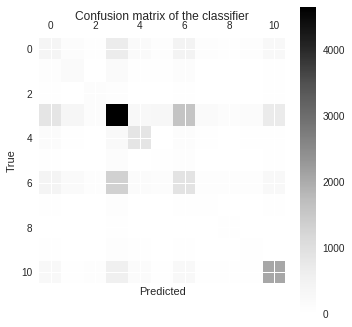

In [0]:
predicted_label=  lr_model.predict(pipeline_test_tf)
import pylab as pl
cm=confusion_matrix(true_label, test_labels)
pl.matshow(cm,'b')
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

**Error Analysis**

In [0]:
def print_errors(labels, predictions, data):
  label_arr = labels.values
  for idx, prediction in enumerate(predictions): 
    label = label_arr[idx]
    if prediction != label:
      print(idx, label, prediction, data.iloc[idx]['body'])
print_errors(test_labels, true_label, post_test)
    

0 question appreciation Edit: I'm in the Oklahoma City and Tulsa Oklahoma area BTW, and thanks for everyone's input!
1 question disagreement are you in the USA?  i would say that unless the road says "no stopping unless emergency" or something then you are good to go.  that being said, fully expect a cop to stop and harass you about it.

i moved (from the US) to new zealand and stopped on the side of the desert highway (where you can see Mt Doom from LotR) to take some photos at night, a cop stopped, turned around, and came... and asked if i needed help!  ah, kiwi land =)
3 appreciation answer Great info! It shows that stopping on a highway should be taken seriously. Those rules were made for a reason. Even tow truck drivers need special certification to work on the side of the highway. Cars and semis are travelling fast and drivers are in a groove. Not to mention at night there will be people dosing and drifting onto the curb. 

I've stopped at night for interesting thunderstorms or c

**Logistic Regression TFIDF Model With Best Parameters  With Six Features**

In [0]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
#Pipeline Creation
prediction_pipeline_tfid = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
             ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000)),
              ])),
              ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000)), 
              ])),
              ('selfpost', Pipeline([
              ('selector', ItemSelector(key='selfpost')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000)), 
              ])),
              ('authorcheck', Pipeline([
              ('selector', ItemSelector(key='author_check')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000)), 
              ])),
              ('majoritylink', Pipeline([
              ('selector', ItemSelector(key='majority_link')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000)), 
              ])),
               ('postdepth', Pipeline([
              ('selector', ItemSelector(key='post_depth')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000)), 
              ])),
              ('subreddit', Pipeline([
              ('selector', ItemSelector(key='subreddit')),
              ('tfid', TfidfVectorizer(tokenizer=tokenize_normalize,sublinear_tf=False,ngram_range=(1, 1),max_features=10000)), 
              ])),
             
        ])
        )
    ])
#Variable Declaration
pipeline_train_tf=prediction_pipeline_tfid.fit_transform(post_train)
#pipeline_validation_tf=prediction_pipeline_tfid.transform(tmp_validation)
pipeline_test_tf=prediction_pipeline_tfid.transform(post_test)
lr = LogisticRegression(C=100,multi_class='ovr',solver='liblinear')
lr_model = lr.fit(pipeline_train_tf, train_labels)
categories=['Blank','Agreement','Announcement','Answer','Appreciation','Disagreement','Elaboration','Humor','Negative']
#Evaluation on validation Data
#evaluation_summary("LR TFidf Feature Union Best Features Validation", lr_model.predict(pipeline_validation_tf), validation_labels)

#Evaluation on Test Data
evaluation_summary("LR TFidf Feature Union Best Features Test", lr_model.predict(pipeline_test_tf),test_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Evaluation for: LR TFidf Feature Union Best Features Test
Accuracy 0.5182151423270127
('LR TFidf Feature Union Best Features Test', 0.5182151423270127, 0.5182151423270127, 0.5182151423270127, 0.5182151423270127)
                  precision    recall  f1-score   support

           Blank      0.186     0.184     0.185      2318
       agreement      0.239     0.303     0.267       749
    announcement      0.663     0.684     0.673       354
          answer      0.711     0.619     0.662      9124
    appreciation      0.552     0.599     0.574      1585
    disagreement      0.070     0.141     0.094       320
     elaboration      0.347     0.334     0.340      3772
           humor      0.072     0.149     0.097       221
negativereaction      0.094     0.261     0.139       111
           other      0.293     0.591     0.391       186
        question      0.726     0.740     0.733      3357

       micro avg      0.518     0.518     0.518     22097
       macro avg      0.359     

**Feature Importance Graph**

In [0]:
!pip install eli5

    100% |████████████████████████████████| 102kB 4.3MB/s 


In [0]:
import eli5
eli5.show_weights(lr, vec=prediction_pipeline_tfid, top=20)



**References**

1. Lab1
2. Lab2
3. Lab 5
4. Advanced Classification 